## Stock Price Forecasting Using LSTM And GRU

### Project Introduction

Stock price forecasting is a critical aspect of financial analysis and investment strategy. Accurate predictions of stock prices can aid in making informed investment decisions, mitigating risks, and enhancing profitability. In this project, we focus on using Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) neural networks for forecasting stock prices. LSTM and GRU are types of Recurrent Neural Networks (RNNs) designed to capture time-dependent patterns in sequential data, making them suitable for stock price prediction where historical data is used to forecast future prices.

### Dataset Overview
The dataset provided contains historical stock price information with the following attributes:
Adj Close: Adjusted closing price of the stock.
Open: Opening price of the stock.
High: Highest price of the stock during the trading day.
Low: Lowest price of the stock during the trading day.
Close: Closing price of the stock.
Volume: Number of shares traded.

In [9]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [10]:
#Load the dataset
df = pd.read_csv('stock_data.csv', parse_dates=['Date'], index_col='Date')

In [11]:
#Display top 5 rows of data
df.head()

,Adj Close,Open,High,Low,Close,Volume
Date,,,,,,
2013-01-02,12.87,12.80,12.90,12.66,12.87,65420000
2013-01-03,12.92,12.86,13.04,12.82,12.92,55018000
2013-01-04,12.96,12.88,12.99,12.83,12.96,37484000
2013-01-07,13.42,13.15,13.49,13.13,13.42,98200000
2013-01-08,13.32,13.35,13.45,13.18,13.32,60214000


In [12]:
#Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2417 entries, 2013-01-02 to 2022-08-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2417 non-null   float64
 1   Open       2417 non-null   float64
 2   High       2417 non-null   float64
 3   Low        2417 non-null   float64
 4   Close      2417 non-null   float64
 5   Volume     2417 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 132.2 KB


### Statistical Description of data

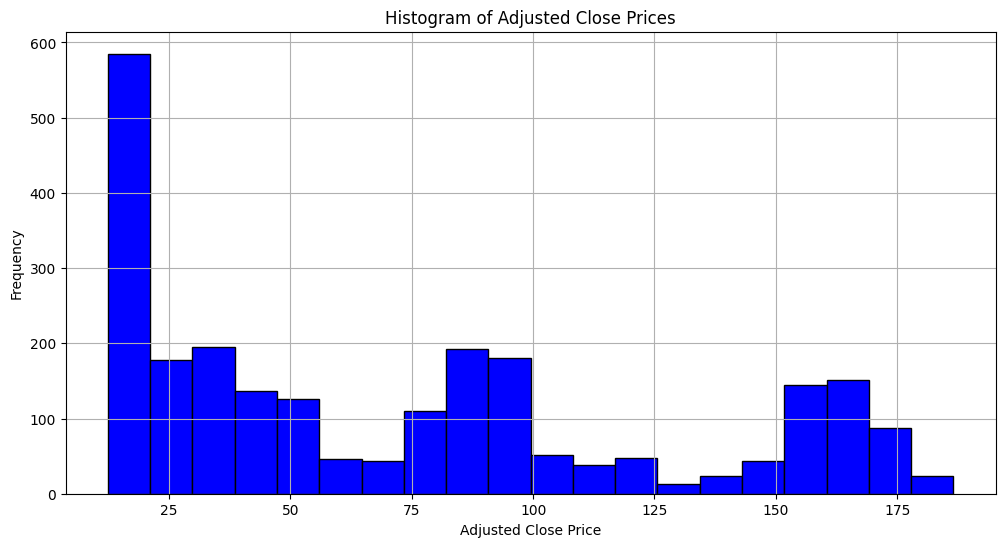

In [13]:
# 1. Histogram of Adjusted Close Prices
plt.figure(figsize=(12, 6))
plt.hist(df['Adj Close'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Adjusted Close Prices')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('histogram_adj_close.png')
plt.show()
# Description: This histogram illustrates the distribution of trading volumes, highlighting the frequency of different volume ranges traded.

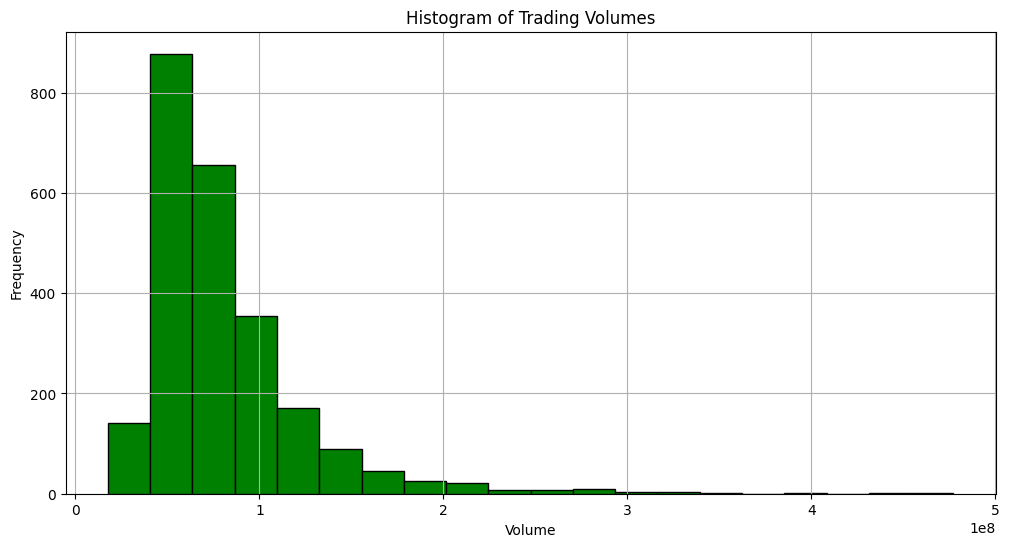

In [53]:
# 2. Histogram of Trading Volumes
plt.figure(figsize=(12, 6))
plt.hist(df['Volume'], bins=20, color='green', edgecolor='black')
plt.title('Histogram of Trading Volumes')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('histogram_volume.png')
plt.show()
# Description: This histogram illustrates the distribution of trading volumes, highlighting the frequency of different volume ranges traded.

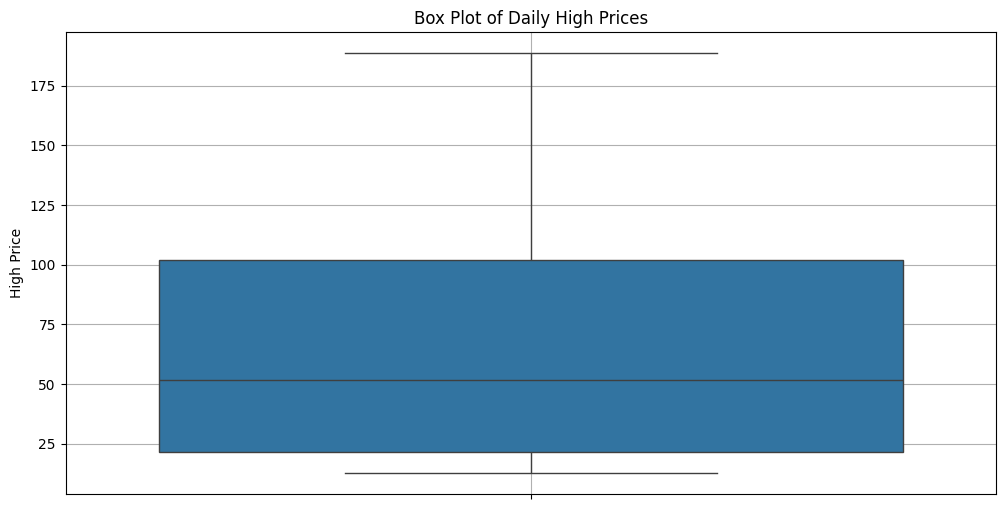

In [54]:
# 3. Box Plot of Daily High Prices
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['High'])
plt.title('Box Plot of Daily High Prices')
plt.ylabel('High Price')
plt.grid(True)
plt.savefig('boxplot_high.png')
plt.show()
# Description: The box plot shows the distribution of daily high prices, identifying potential outliers and the overall range of high prices.


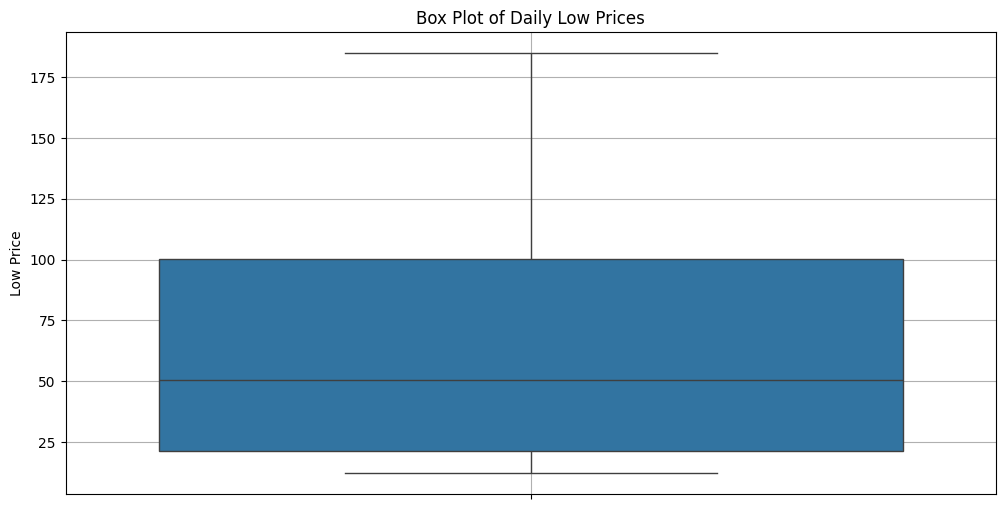

In [55]:
# 4. Box Plot of Daily Low Prices
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['Low'])
plt.title('Box Plot of Daily Low Prices')
plt.ylabel('Low Price')
plt.grid(True)
plt.savefig('boxplot_low.png')
plt.show()
# Description: This box plot provides insights into the distribution of daily low prices, highlighting any outliers and the range of low prices.

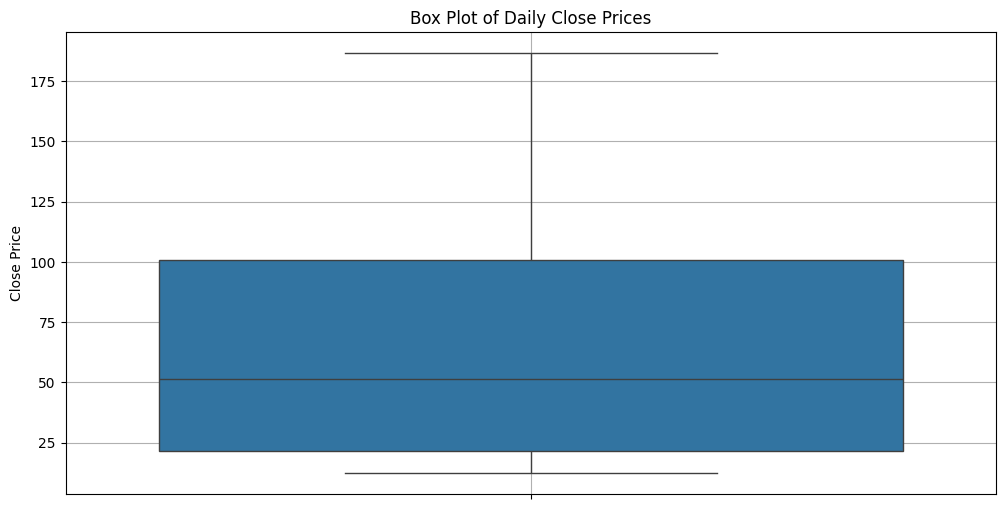

In [56]:
# 5. Box Plot of Daily Close Prices
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['Close'])
plt.title('Box Plot of Daily Close Prices')
plt.ylabel('Close Price')
plt.grid(True)
plt.savefig('boxplot_close.png')
plt.show()
# Description: The box plot displays the distribution of daily closing prices, helping to identify any outliers and the range of closing prices.

### Data Exploration Figures

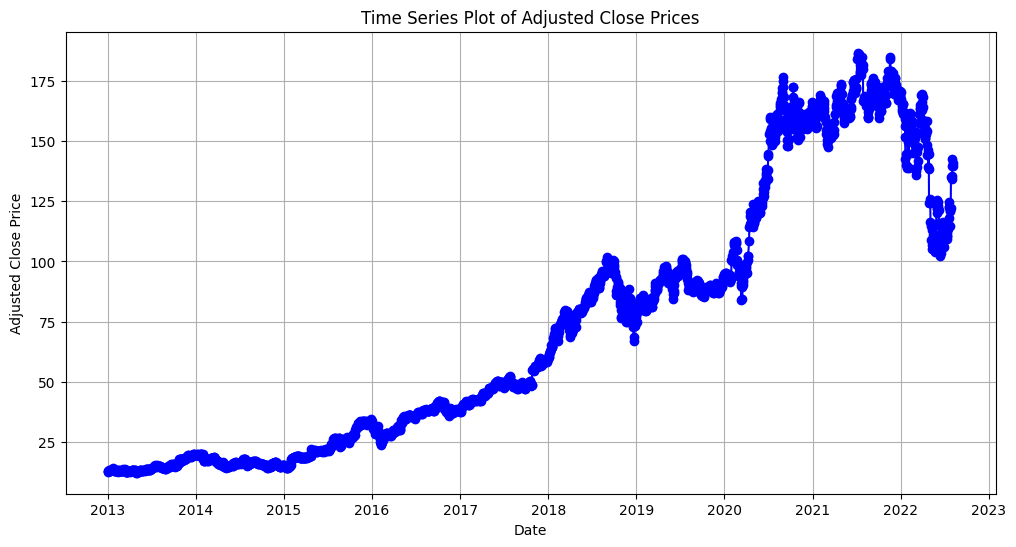

In [57]:
# 6. Time Series Plot of Adjusted Close Prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], marker='o', color='blue')
plt.title('Time Series Plot of Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.savefig('time_series_adj_close.png')
plt.show()
# Description: This time series plot shows the trend of adjusted close prices over the specified dates, helping to visualize the price movements.

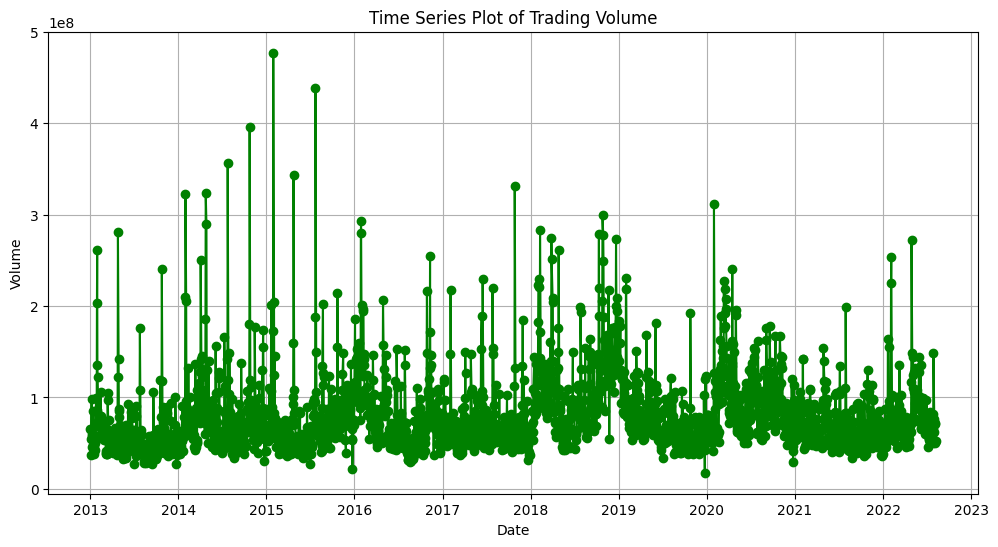

In [58]:
# 7. Time Series Plot of Trading Volume
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'], marker='o', color='green')
plt.title('Time Series Plot of Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.savefig('time_series_volume.png')
plt.show()
# Description: The time series plot of trading volume provides a view of how the trading volume has changed over the given dates.


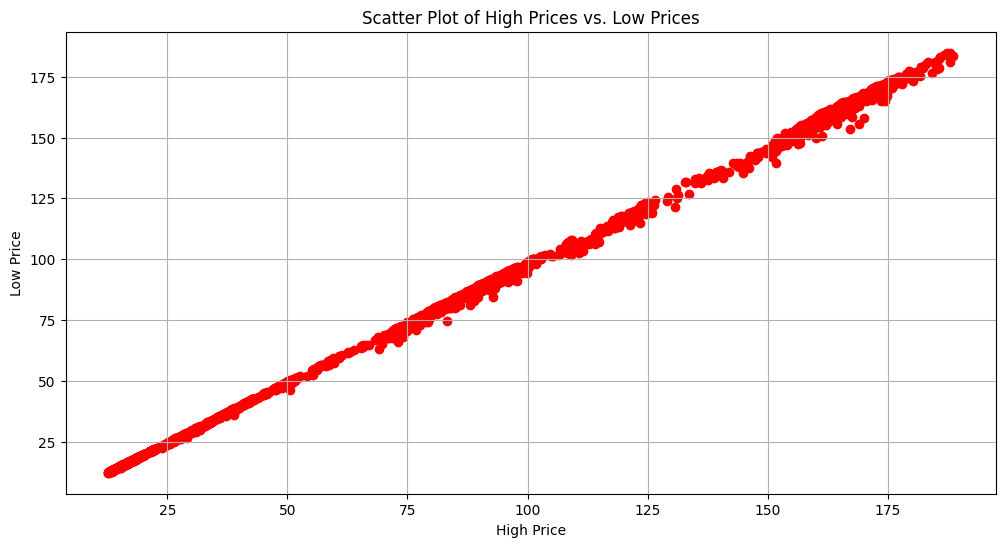

In [59]:
# 8. Scatter Plot of High Prices vs. Low Prices
plt.figure(figsize=(12, 6))
plt.scatter(df['High'], df['Low'], color='red')
plt.title('Scatter Plot of High Prices vs. Low Prices')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.grid(True)
plt.savefig('scatter_high_low.png')
plt.show()
# Description: This scatter plot illustrates the relationship between daily high and low prices, indicating any patterns or correlations.

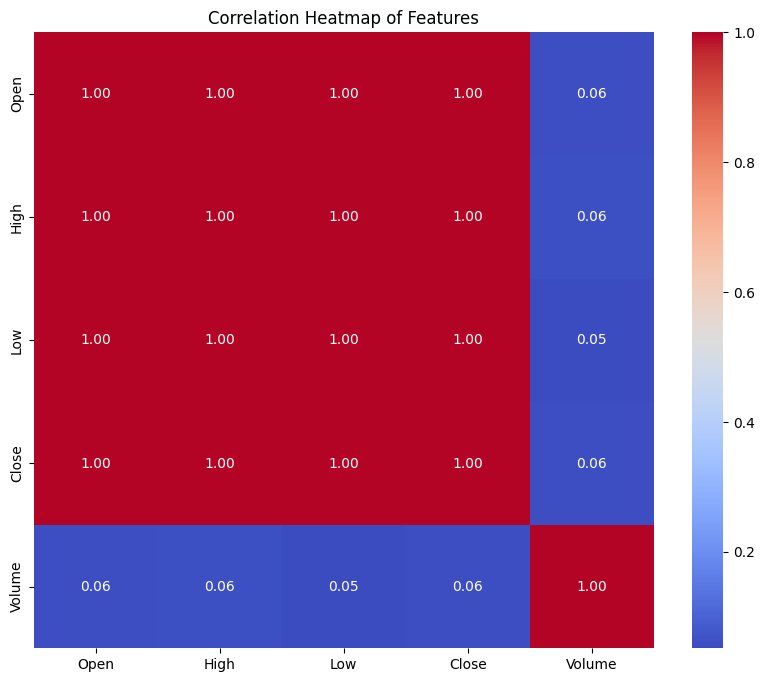

In [60]:
# 10. Correlation Heatmap of Features
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.savefig('correlation_heatmap.png')
plt.show()
# Description: The heatmap displays the correlation between various features (Open, High, Low, Close, Volume), highlighting their relationships.


### Understanding More about the data

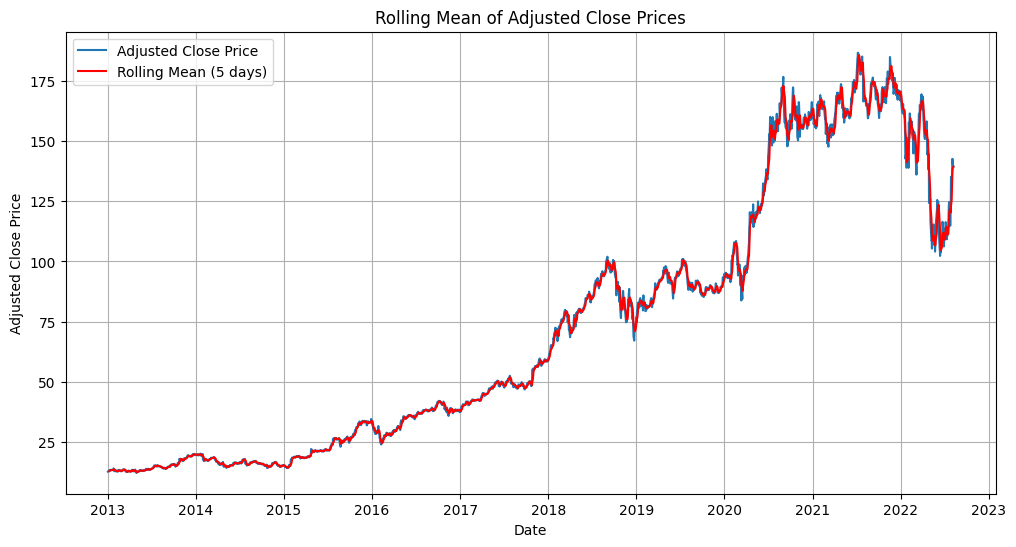

In [61]:
# 11. Rolling Mean of Adjusted Close Prices
plt.figure(figsize=(12, 6))
df['Rolling Mean'] = df['Adj Close'].rolling(window=5).mean()
plt.plot(df.index, df['Adj Close'], label='Adjusted Close Price')
plt.plot(df.index, df['Rolling Mean'], label='Rolling Mean (5 days)', color='red')
plt.title('Rolling Mean of Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.savefig('rolling_mean.png')
plt.show()
# Description: This plot shows the adjusted close prices along with a 5-day rolling mean, highlighting the trend and smoothing out short-term fluctuations.

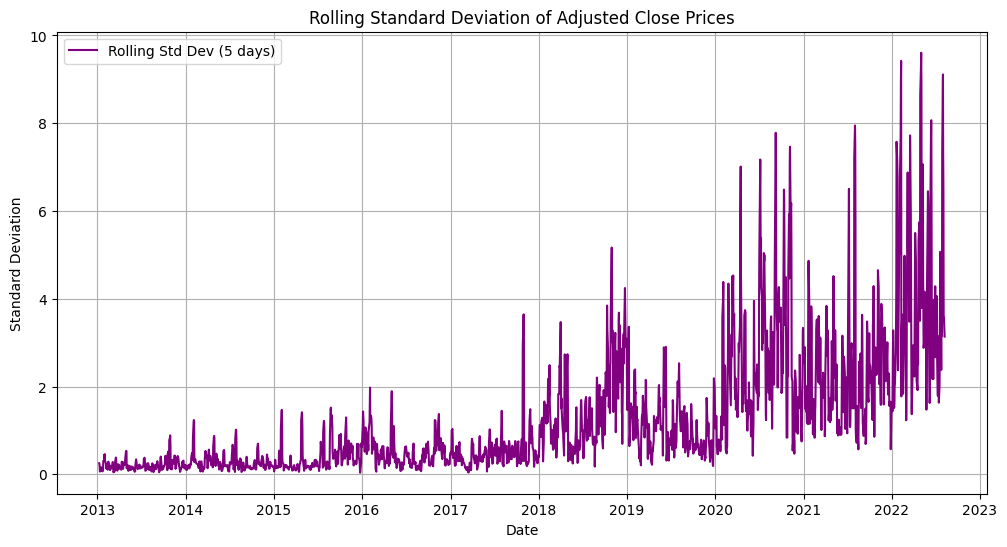

In [62]:
# 12. Rolling Standard Deviation of Adjusted Close Prices
plt.figure(figsize=(12, 6))
df['Rolling Std'] = df['Adj Close'].rolling(window=5).std()
plt.plot(df.index, df['Rolling Std'], label='Rolling Std Dev (5 days)', color='purple')
plt.title('Rolling Standard Deviation of Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.savefig('rolling_std.png')
plt.show()
# Description: This plot shows the 5-day rolling standard deviation of adjusted close prices, providing insights into price volatility.


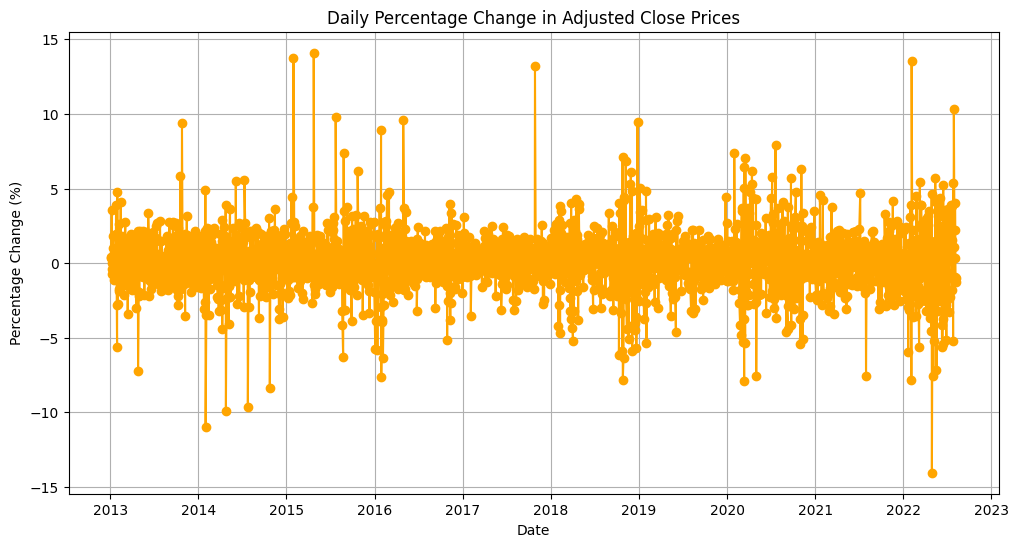

In [63]:
# 13. Daily Percentage Change in Adjusted Close Prices
plt.figure(figsize=(12, 6))
df['Pct Change'] = df['Adj Close'].pct_change() * 100
plt.plot(df.index, df['Pct Change'], marker='o', color='orange')
plt.title('Daily Percentage Change in Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.savefig('pct_change.png')
plt.show()
# Description: The plot displays the daily percentage change in adjusted close prices, showing the variability in price changes over time.

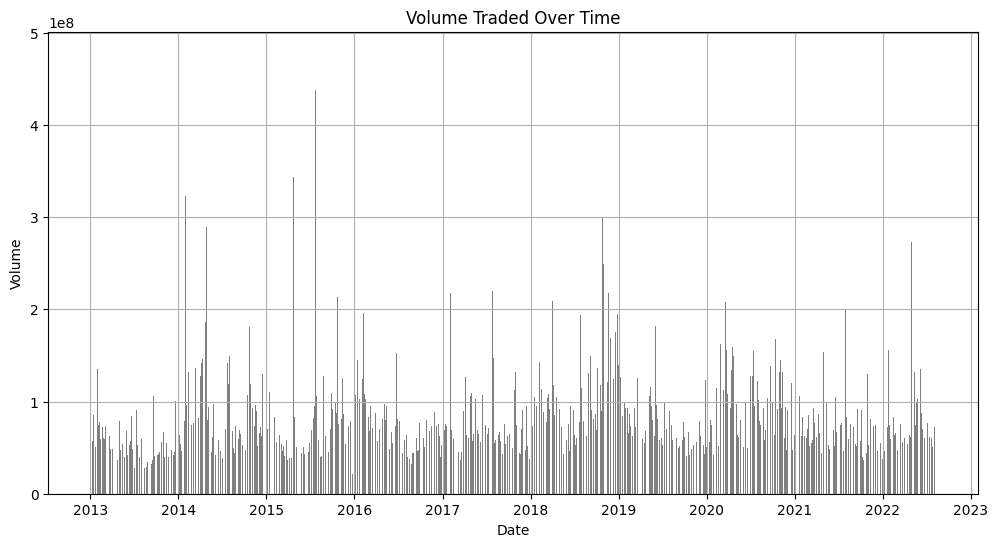

In [64]:
# 14. Volume Traded Over Time
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['Volume'], color='gray')
plt.title('Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.savefig('volume_traded.png')
plt.show()
# Description: This bar plot illustrates the volume of shares traded over time, indicating periods of high or low trading activity.

### Resampling and Rolling Statistics

Resampling is used to aggregate data over a specified frequency, and rolling statistics help to smooth the data to observe trends.

In [65]:
# Resample to get weekly data
weekly_df = df.resample('W').agg({
    'Adj Close': 'mean',
    'Open': 'mean',
    'High': 'mean',
    'Low': 'mean',
    'Close': 'mean',
    'Volume': 'mean'
})

# Calculate rolling statistics with a window of 5 days
df['Rolling Mean'] = df['Adj Close'].rolling(window=5).mean()
df['Rolling Std'] = df['Adj Close'].rolling(window=5).std()


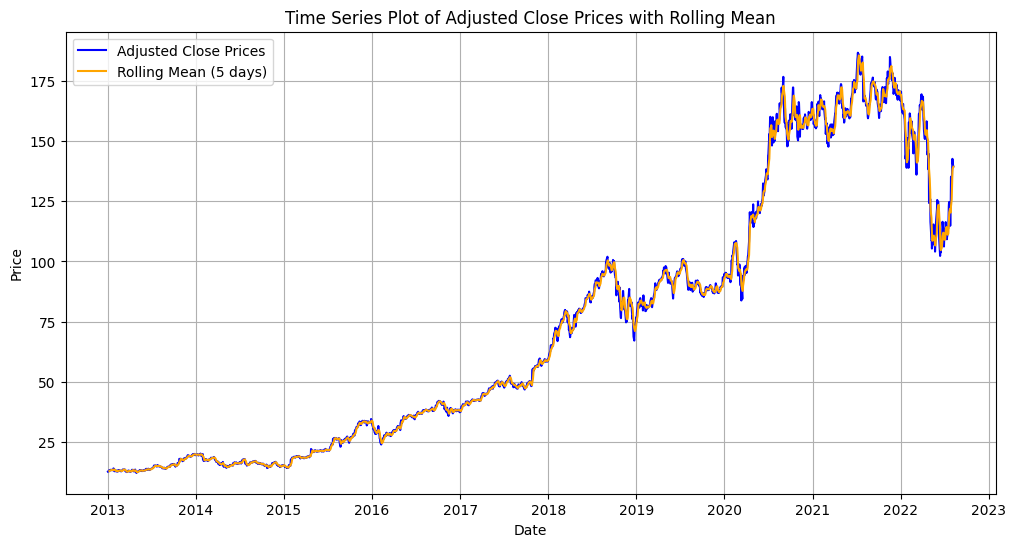

In [66]:
# Time Series Plot of Adjusted Close Prices with Rolling Mean
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Adjusted Close Prices', color='blue')
plt.plot(df.index, df['Rolling Mean'], label='Rolling Mean (5 days)', color='orange')
plt.title('Time Series Plot of Adjusted Close Prices with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.savefig('time_series_adj_close_rolling_mean.png')
plt.show()

Explanation: This graph shows the adjusted close prices over time with a 5-day rolling mean overlayed. The rolling mean smooths out short-term fluctuations, making it easier to observe the overall trend in prices.

In [67]:
# #  Time Series Plot of Volume
# plt.figure(figsize=(12, 6))
# plt.plot(df.index, df['Volume'], color='green')
# plt.title('Time Series Plot of Trading Volume')
# plt.xlabel('Date')
# plt.ylabel('Volume')
# plt.grid(True)
# plt.savefig('time_series_volume.png')
# plt.show()


Explanation: This graph illustrates the trading volume over time. Analyzing volume trends can help identify periods of high trading activity and potential market reactions.

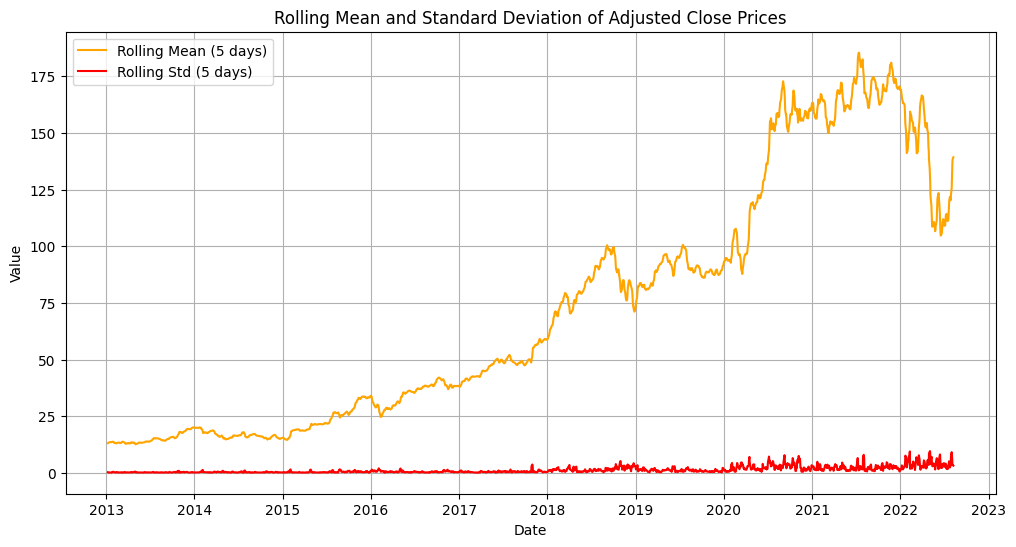

In [68]:
# Rolling Mean and Standard Deviation of Adjusted Close Prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Rolling Mean'], label='Rolling Mean (5 days)', color='orange')
plt.plot(df.index, df['Rolling Std'], label='Rolling Std (5 days)', color='red')
plt.title('Rolling Mean and Standard Deviation of Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('rolling_mean_std.png')
plt.show()


Explanation: This graph displays the rolling mean and standard deviation of the adjusted close prices. The rolling standard deviation gives an idea of the volatility of the stock over the specified window.

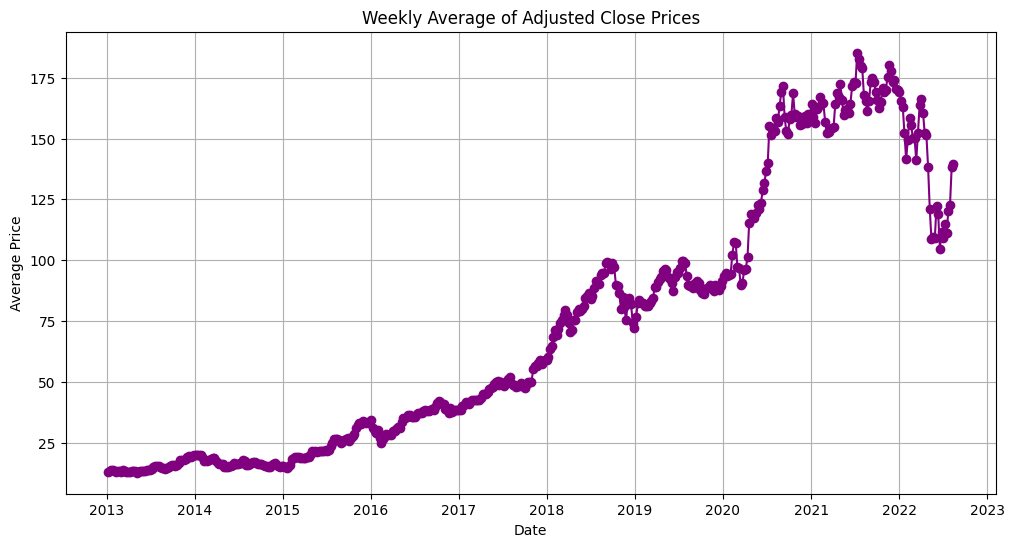

In [69]:
# Weekly Average of Adjusted Close Prices
plt.figure(figsize=(12, 6))
plt.plot(weekly_df.index, weekly_df['Adj Close'], marker='o', color='purple')
plt.title('Weekly Average of Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.savefig('weekly_avg_adj_close.png')
plt.show()


Explanation: This graph shows the average adjusted close prices on a weekly basis. It helps to visualize longer-term trends and patterns in the data by aggregating daily data into weekly averages.

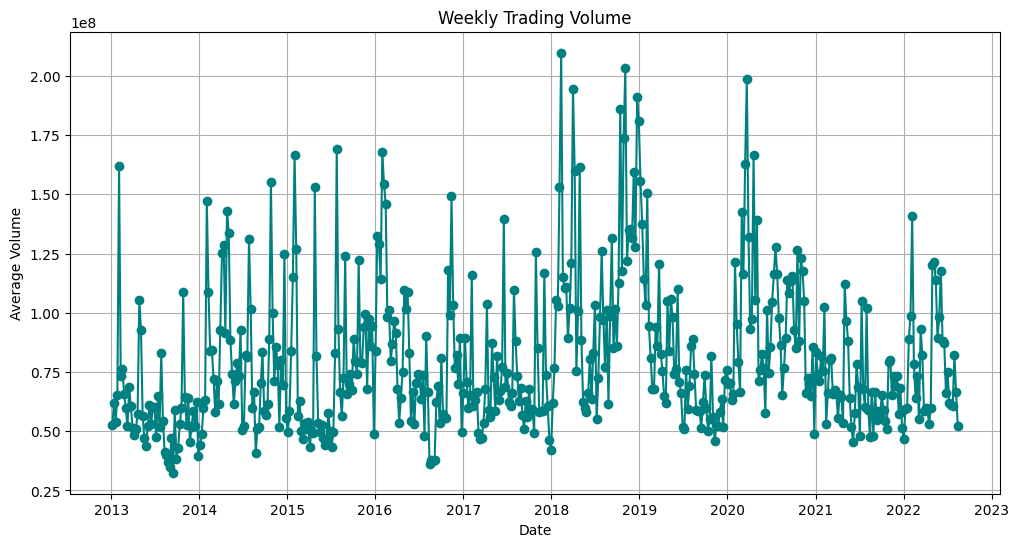

In [70]:
# Weekly Trading Volume
plt.figure(figsize=(12, 6))
plt.plot(weekly_df.index, weekly_df['Volume'], marker='o', color='teal')
plt.title('Weekly Trading Volume')
plt.xlabel('Date')
plt.ylabel('Average Volume')
plt.grid(True)
plt.savefig('weekly_volume.png')
plt.show()


Explanation: This graph illustrates the weekly average trading volume. By aggregating the daily volume data into weekly totals, it provides insight into broader trading activity trends over time.

## Training Model LSTM and GRU Models

Epoch 1/100
28/28 [==============================] - 4s 25ms/step - loss: 0.5134 - val_loss: 1.0978
Epoch 2/100
28/28 [==============================] - 0s 8ms/step - loss: 0.2105 - val_loss: 0.9999
Epoch 3/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0429 - val_loss: 0.3641
Epoch 4/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0224 - val_loss: 0.0561
Epoch 5/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0176 - val_loss: 0.0809
Epoch 6/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0167 - val_loss: 0.1064
Epoch 7/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0172 - val_loss: 0.0656
Epoch 8/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0162 - val_loss: 0.1926
Epoch 9/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0148 - val_loss: 0.1693
Epoch 10/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0143 - val_loss: 0.2210
Epoch 11

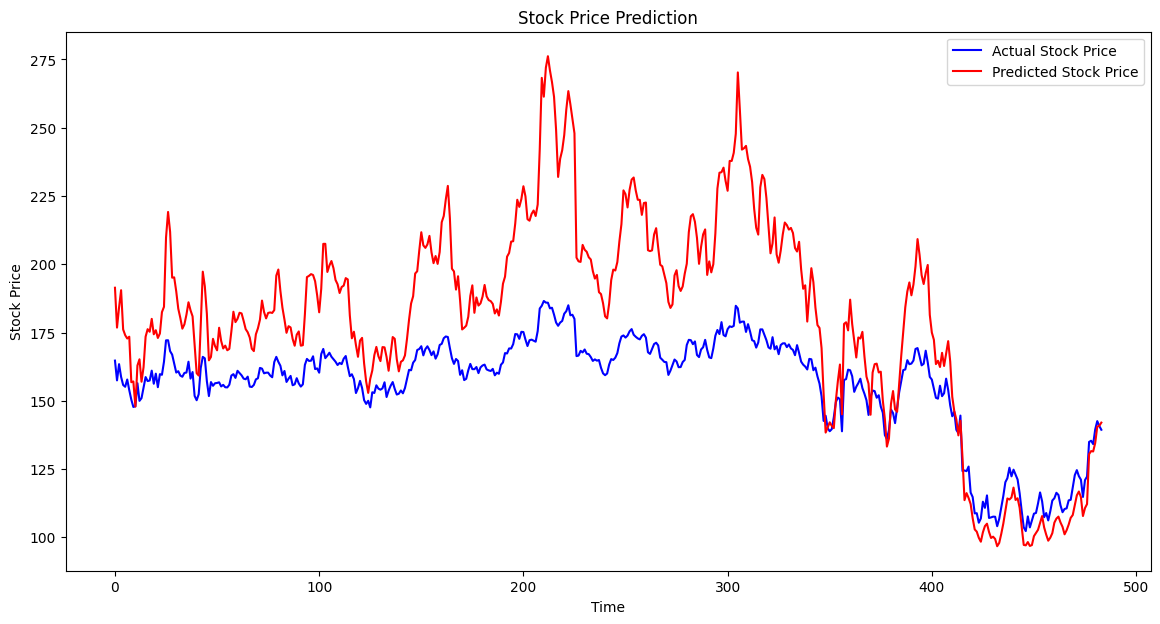

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load the data
data = pd.read_csv('stock_data.csv')

# Define features and target
X = data[['Open', 'High', 'Low', 'Volume']].values
y = data['Adj Close'].values

# Scale features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Reshape X for LSTM [samples, timesteps, features]
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

def LSTM_model_regularization(X_train, y_train, X_test, y_test, scaler_y):
    # Create the LSTM model
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
    model.add(Dropout(0.3))
    model.add(LSTM(units=100, return_sequences=True, activation='relu'))
    model.add(Dropout(0.3))
    model.add(LSTM(units=100, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units=1))

    # Compile the model with Adam optimizer and learning rate scheduling
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Fit the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1, callbacks=[early_stopping], verbose=1)

    # Make predictions
    y_pred_scaled = model.predict(X_test)
    y_test = scaler_y.inverse_transform(y_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)

    # Plotting results
    plt.figure(figsize=(14, 7))
    plt.plot(y_test, color='blue', label='Actual Stock Price')
    plt.plot(y_pred, color='red', label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    return model, history

# Train and evaluate the model
model, history = LSTM_model_regularization(X_train, y_train, X_test, y_test, scaler_y)

Epoch 1/100
28/28 [==============================] - 5s 29ms/step - loss: 0.3074 - val_loss: 1.0221
Epoch 2/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0418 - val_loss: 0.2631
Epoch 3/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0139 - val_loss: 0.1548
Epoch 4/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0117 - val_loss: 0.1051
Epoch 5/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0112 - val_loss: 0.0739
Epoch 6/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0110 - val_loss: 0.0545
Epoch 7/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0092 - val_loss: 0.0286
Epoch 8/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0089 - val_loss: 0.0149
Epoch 9/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0090 - val_loss: 0.0101
Epoch 10/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 11

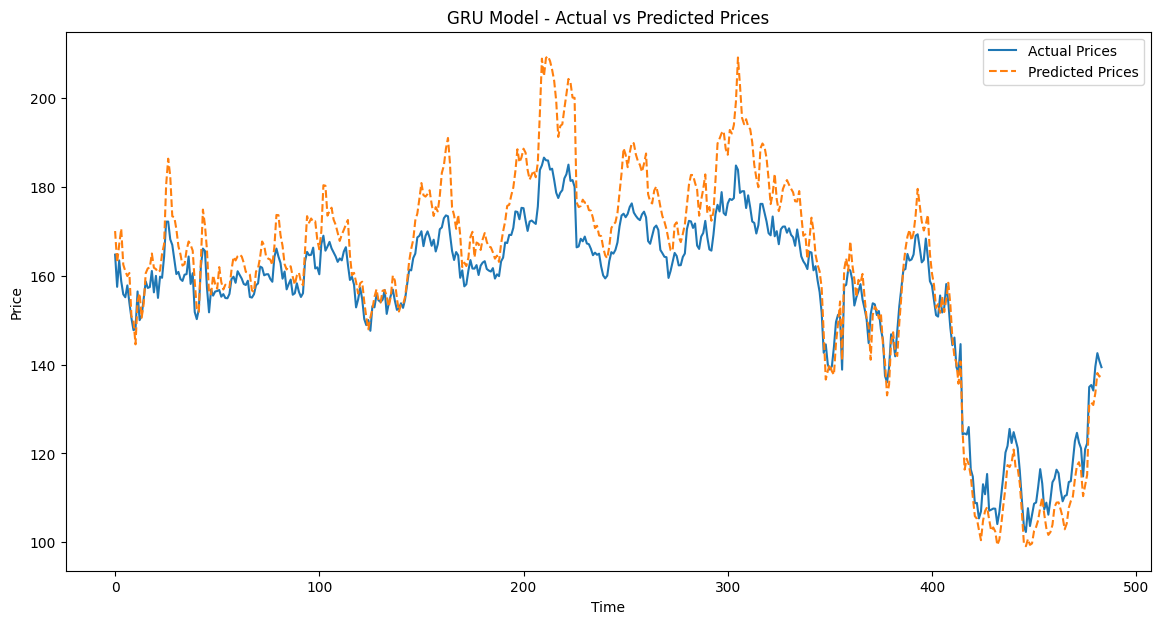

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, GRU, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load the data
data = pd.read_csv('stock_data.csv')

# Define features and target
X = data[['Open', 'High', 'Low', 'Volume']].values
y = data['Adj Close'].values

# Scale features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Reshape X for GRU [samples, timesteps, features]
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

def GRU_model_regularization(X_train, y_train, X_test, y_test, scaler_y):
    # Create the GRU model
    model = Sequential()
    model.add(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
    model.add(Dropout(0.2))
    model.add(GRU(units=100, return_sequences=True, activation='relu'))
    model.add(Dropout(0.2))
    model.add(GRU(units=100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))  # Output layer for regression

    # Compile the model with learning rate scheduler
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Fit the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1, callbacks=[early_stopping], verbose=1)

    # Making predictions
    GRU_prediction = model.predict(X_test)

    # Inverse transform predictions and actual values
    y_test = scaler_y.inverse_transform(y_test)
    GRU_prediction = scaler_y.inverse_transform(GRU_prediction)

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(y_test, label='Actual Prices')
    plt.plot(GRU_prediction, label='Predicted Prices', linestyle='--')
    plt.title('GRU Model - Actual vs Predicted Prices')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    return history

# Train the GRU model and plot results
history = GRU_model_regularization(X_train, y_train, X_test, y_test, scaler_y)

Model Architecture:

Three GRU layers with 100 units each and ReLU activation.
Dropout layers to prevent overfitting.
Optimizer:

Adam optimizer with a learning rate of 0.001.
Early Stopping:

Stops training when validation loss does not improve for 10 epochs, restoring the best weights.
Plotting:

Compares the actual vs. predicted prices using Matplotlib.

## Model training using Random Forest and SVM

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('stock_data.csv')

# Define features and target
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Adj Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor with low parameters
rf = RandomForestRegressor(n_estimators=5, max_depth=2, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")


MSE: 85.57


Mean Squared Error (MSE): This metric measures the average squared difference between the predicted and actual values. Lower MSE values indicate better model performance.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('stock_data.csv')

# Define features and target
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Adj Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Initialize SVR with a linear kernel
svm = SVR()

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f"SVR MSE: {mse_svm:.2f}")

SVR MSE: 2878.20


# **Gated Recurrect Unit**

Epoch 1/100
28/28 [==============================] - 5s 34ms/step - loss: 0.3510 - val_loss: 0.9188
Epoch 2/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0371 - val_loss: 0.1084
Epoch 3/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0156 - val_loss: 0.1525
Epoch 4/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0123 - val_loss: 0.1033
Epoch 5/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0120 - val_loss: 0.0577
Epoch 6/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0111 - val_loss: 0.0253
Epoch 7/100
28/28 [==============================] - 0s 13ms/step - loss: 0.0106 - val_loss: 0.0039
Epoch 8/100
28/28 [==============================] - 0s 9ms/step - loss: 0.0101 - val_loss: 0.0056
Epoch 9/100
28/28 [==============================] - 0s 8ms/step - loss: 0.0088 - val_loss: 0.0121
Epoch 10/100
28/28 [==============================] - 0s 10ms/step - loss: 0.0087 - val_loss: 0.0114
Epoch 

C:\Users\0860\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 1s 3ms/step


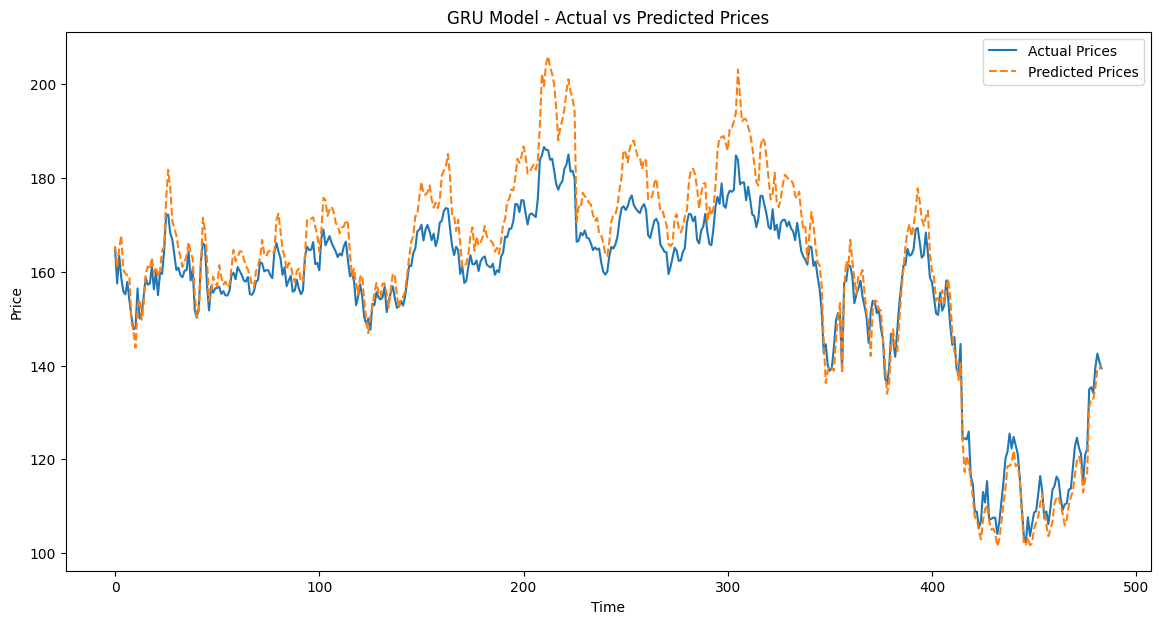

In [20]:
import joblib
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, GRU, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
# Load the data
data = pd.read_csv('stock_data.csv')

# Define features and target
X = data[['Open', 'High', 'Low', 'Volume']].values
y = data['Adj Close'].values

# Scale features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Reshape X for GRU [samples, timesteps, features]
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

def GRU_model_regularization(X_train, y_train, X_test, y_test, scaler_y):
    # Create the GRU model
    model = Sequential()
    model.add(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
    model.add(Dropout(0.2))
    model.add(GRU(units=100, return_sequences=True, activation='relu'))
    model.add(Dropout(0.2))
    model.add(GRU(units=100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))  # Output layer for regression

    # Compile the model with learning rate scheduler
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Fit the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1, callbacks=[early_stopping], verbose=1)

    # Save the model
    model.save('gru_stock_model.h5')

    # Save the scalers
    joblib.dump(scaler_X, 'scaler_X.joblib')
    joblib.dump(scaler_y, 'scaler_y.joblib')

    # Making predictions
    GRU_prediction = model.predict(X_test)

    # Inverse transform predictions and actual values
    y_test = scaler_y.inverse_transform(y_test)
    GRU_prediction = scaler_y.inverse_transform(GRU_prediction)

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(y_test, label='Actual Prices')
    plt.plot(GRU_prediction, label='Predicted Prices', linestyle='--')
    plt.title('GRU Model - Actual vs Predicted Prices')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    return history

# Train the GRU model and plot results
history = GRU_model_regularization(X_train, y_train, X_test, y_test, scaler_y)


##  **stacked LSTM**

Epoch 1/100
28/28 [==============================] - 5s 29ms/step - loss: 0.5105 - val_loss: 1.0763
Epoch 2/100
28/28 [==============================] - 0s 8ms/step - loss: 0.1942 - val_loss: 0.8414
Epoch 3/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0300 - val_loss: 0.0419
Epoch 4/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0134 - val_loss: 0.0594
Epoch 5/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0131 - val_loss: 0.1244
Epoch 6/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0120 - val_loss: 0.1621
Epoch 7/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0115 - val_loss: 0.2738
Epoch 8/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0110 - val_loss: 0.4159
Epoch 9/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0106 - val_loss: 0.6285
Epoch 10/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0107 - val_loss: 0.5353
Epoch 11

C:\Users\0860\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 1s 2ms/step


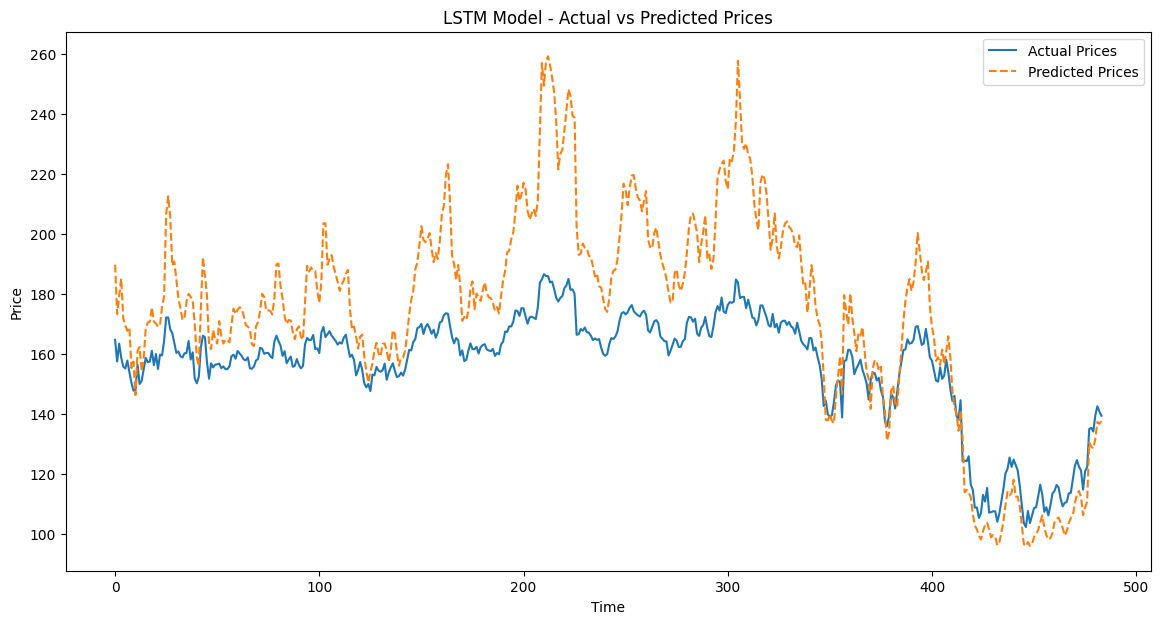

In [21]:
import joblib
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('stock_data.csv')

# Define features and target
X = data[['Open', 'High', 'Low', 'Volume']].values
y = data['Adj Close'].values

# Scale features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Reshape X for LSTM [samples, timesteps, features]
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

def LSTM_model_regularization(X_train, y_train, X_test, y_test, scaler_y):
    # Create the LSTM model
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=100, return_sequences=True, activation='relu'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))  # Output layer for regression

    # Compile the model with learning rate scheduler
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Fit the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1, callbacks=[early_stopping], verbose=1)

    # Save the model
    model.save('lstm_stack_model.h5')

    # Save the scalers
    joblib.dump(scaler_X, 'stack_scaler_X.joblib')
    joblib.dump(scaler_y, 'stack_scaler_y.joblib')

    # Making predictions
    LSTM_prediction = model.predict(X_test)

    # Inverse transform predictions and actual values
    y_test = scaler_y.inverse_transform(y_test)
    LSTM_prediction = scaler_y.inverse_transform(LSTM_prediction)

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(y_test, label='Actual Prices')
    plt.plot(LSTM_prediction, label='Predicted Prices', linestyle='--')
    plt.title('LSTM Model - Actual vs Predicted Prices')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    return history

# Train the LSTM model and plot results
history = LSTM_model_regularization(X_train, y_train, X_test, y_test, scaler_y)

# **Stacked GRU**

Epoch 1/100
28/28 [==============================] - 6s 29ms/step - loss: 0.3573 - val_loss: 1.0421
Epoch 2/100
28/28 [==============================] - 0s 9ms/step - loss: 0.0488 - val_loss: 0.1549
Epoch 3/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0141 - val_loss: 0.0797
Epoch 4/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0132 - val_loss: 0.0640
Epoch 5/100
28/28 [==============================] - 0s 9ms/step - loss: 0.0114 - val_loss: 0.0271
Epoch 6/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0106 - val_loss: 0.0099
Epoch 7/100
28/28 [==============================] - 0s 13ms/step - loss: 0.0105 - val_loss: 0.0094
Epoch 8/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0092 - val_loss: 0.0121
Epoch 9/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0091 - val_loss: 0.0296
Epoch 10/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0090 - val_loss: 0.0693
Epoch 1

C:\Users\0860\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 0s 2ms/step


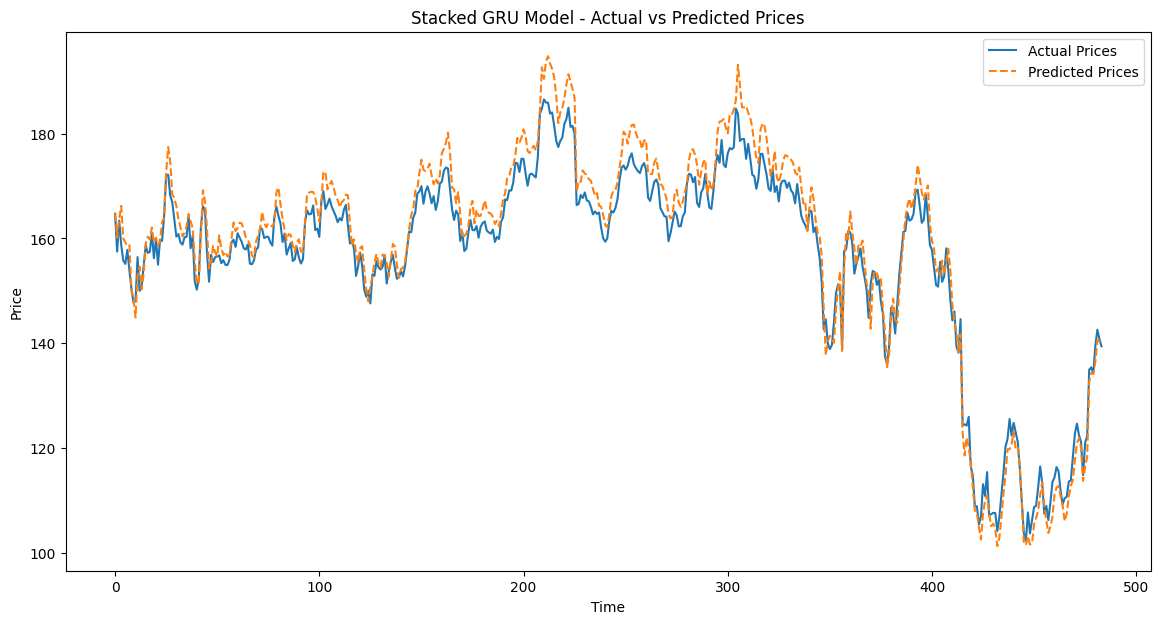

In [22]:
# Define features and target
X = data[['Open', 'High', 'Low', 'Volume']].values
y = data['Adj Close'].values

# Scale features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Reshape X for GRU [samples, timesteps, features]
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

def GRU_model_regularization(X_train, y_train, X_test, y_test, scaler_y):
    # Create the GRU model
    model = Sequential()
    model.add(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
    model.add(Dropout(0.2))
    model.add(GRU(units=100, return_sequences=True, activation='relu'))
    model.add(Dropout(0.2))
    model.add(GRU(units=100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))  # Output layer for regression

    # Compile the model with learning rate scheduler
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Fit the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1, callbacks=[early_stopping], verbose=1)

    # Save the model
    model.save('stacked_gru_stock_model.h5')

    # Save the scalers
    joblib.dump(scaler_X, 'gru_scaler_X.joblib')
    joblib.dump(scaler_y, 'gru_scaler_y.joblib')

    # Making predictions
    GRU_prediction = model.predict(X_test)

    # Inverse transform predictions and actual values
    y_test = scaler_y.inverse_transform(y_test)
    GRU_prediction = scaler_y.inverse_transform(GRU_prediction)

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(y_test, label='Actual Prices')
    plt.plot(GRU_prediction, label='Predicted Prices', linestyle='--')
    plt.title('Stacked GRU Model - Actual vs Predicted Prices')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    return history

# Train the stacked GRU model and plot results
history = GRU_model_regularization(X_train, y_train, X_test, y_test, scaler_y)


# **ARIMA Model**

Data Preparation:

Only the target variable (Adj Close) is used since ARIMA is a univariate model.
The target data is scaled using StandardScaler for consistency with previous models.
ARIMA Model:

The ARIMA model is specified with the order=(5, 1, 0) parameters, where:
p=5 is the number of lag observations included in the model (autoregressive part).
d=1 is the degree of differencing to make the time series stationary.
q=0 is the size of the moving average window.
The model is trained iteratively on the training data and used to predict each point in the test data.
Inverse Transformation:

The predicted and actual test values are inverse-transformed to match the original scale of the data.
Evaluation and Plotting:

The Mean Squared Error (MSE) between the actual and predicted values is calculated.
A plot is generated showing the comparison between actual and predicted stock prices.
Saving the Model:

The ARIMA model and the scaler are saved for future use

C:\Users\0860\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\0860\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\0860\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\0860\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\0860\AppData\Roamin

Mean Squared Error: 11.85942414738389


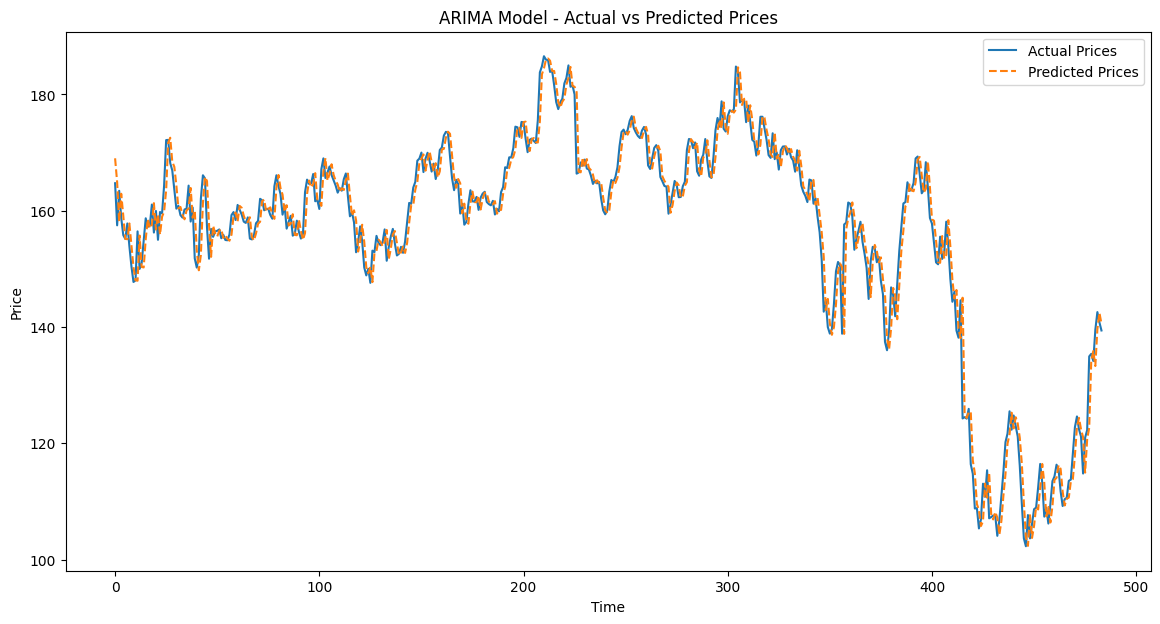

['scaler_y.joblib']

In [24]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
# Load the data
data = pd.read_csv('stock_data.csv')

# Define features and target
y = data['Adj Close'].values

# Scale target
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Split data into training and testing sets
train_size = int(len(y_scaled) * 0.8)
train, test = y_scaled[:train_size], y_scaled[train_size:]

# Define the ARIMA model function
def ARIMA_model(train, test, scaler_y):
    history = [x for x in train]
    predictions = list()

    for t in range(len(test)):
        model = ARIMA(history, order=(5, 1, 0))  # (p, d, q) parameters can be adjusted
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

    # Inverse transform predictions and actual values
    test = scaler_y.inverse_transform(test.reshape(-1, 1)).flatten()
    predictions = scaler_y.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

    # Calculate and print Mean Squared Error
    mse = mean_squared_error(test, predictions)
    print(f'Mean Squared Error: {mse}')

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(test, label='Actual Prices')
    plt.plot(predictions, label='Predicted Prices', linestyle='--')
    plt.title('ARIMA Model - Actual vs Predicted Prices')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    return model_fit

# Train the ARIMA model and plot results
arima_model = ARIMA_model(train, test, scaler_y)

# Save the model
arima_model.save('arima_stock_model.joblib')

# Save the scaler
joblib.dump(scaler_y, 'scaler_y.joblib')